In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("/home/tebrigabby/python/data_files/accidents.csv")
autos = pd.read_csv("/home/tebrigabby/python/data_files/autos1.csv")
concrete = pd.read_csv("/home/tebrigabby/python/data_files/concrete.csv")
customer = pd.read_csv("/home/tebrigabby/python/data_files/customer.csv")

/tmp/ipykernel_14304/1131856989.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
autos["stroke_ratio"] = autos.stroke / autos.bore

autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [4]:
#The more complicated a combination is, the more difficult it will be for a model to learn, like this formula for an engine's "displacement", a measure of its power:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

In [6]:
'''Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms. The distribution of WindSpeed in US Accidents is highly skewed, for instance. In this case the logarithm is effective at normalizing it:'''

'Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms. The distribution of WindSpeed in US Accidents is highly skewed, for instance. In this case the logarithm is effective at normalizing it:'

/tmp/ipykernel_14304/3343200215.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
/tmp/ipykernel_14304/3343200215.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);


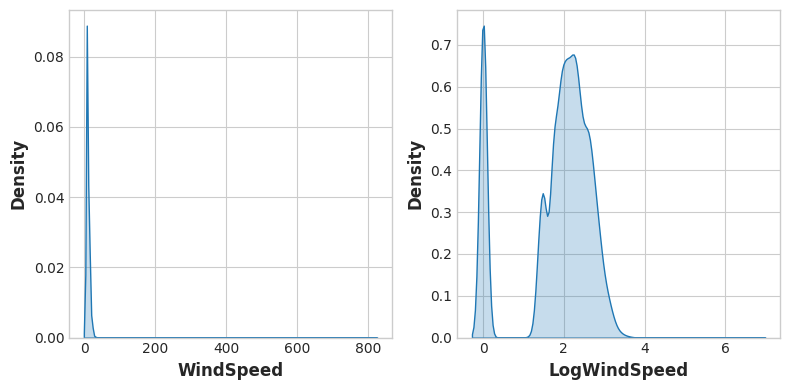

In [7]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [8]:
'''Counts¶
Features describing the presence or absence of something often come in sets, the set of risk factors for a disease, say. You can aggregate such features by creating a count.
These features will be binary (1 for Present, 0 for Absent) or boolean (True or False). In Python, booleans can be added up just as if they were integers.
In Traffic Accidents are several features indicating whether some roadway object was near the accident. This will create a count of the total number of roadway features nearby using the sum method:'''

'Counts¶\nFeatures describing the presence or absence of something often come in sets, the set of risk factors for a disease, say. You can aggregate such features by creating a count.\nThese features will be binary (1 for Present, 0 for Absent) or boolean (True or False). In Python, booleans can be added up just as if they were integers.\nIn Traffic Accidents are several features indicating whether some roadway object was near the accident. This will create a count of the total number of roadway features nearby using the sum method:'

In [9]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [13]:
'''Many formulations lack one or more components (that is, the component has a value of 0). This will count how many components are 
in a formulation with the dataframe's built-in greater-than gt method:'''

components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [14]:
'''The str accessor lets you apply string methods like split directly to columns. The Customer Lifetime Value dataset contains 
features describing customers of an insurance company. From the Policy feature, we could separate the Type from the Level 
of coverage:'''
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [15]:
'''You could also join simple features into a composed feature if you had reason to believe there was some interaction in the combination:'''

autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [16]:
'''Group Transforms
Finally we have Group transforms, which aggregate information across multiple rows grouped by some category.'''

customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [17]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [18]:
# We can use the validation set's merge method after creating a unique set of values with drop_duplicates on the training set:

# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,376.364997
1,Basic,376.364997
2,Basic,376.364997
3,Premium,634.020990
4,Basic,376.364997
5,Basic,376.364997
6,Premium,634.020990
7,Basic,376.364997
8,Basic,376.364997
9,Basic,376.364997


In [19]:
'''
Tips on Creating Features
It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:
Linear models learn sums and differences naturally, but can't learn anything more complex.
Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.
'''

"\nTips on Creating Features\nIt's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:\nLinear models learn sums and differences naturally, but can't learn anything more complex.\nRatios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.\nLinear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.\nTree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.\nCounts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.\n"

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Prepare data
df = pd.read_csv("/home/tebrigabby/python/data_files/ames.csv")
X = df.copy()
y = X.pop("SalePrice")

In [25]:
# 1) Create Mathematical Transforms
# Create the following features:

#LivLotRatio: the ratio of GrLivArea to LotArea
#Spaciousness: the sum of FirstFlrSF and SecondFlrSF divided by TotRmsAbvGrd
#TotalOutsideSF: the sum of WoodDeckSF, OpenPorchSF, EnclosedPorch, Threeseasonporch, and ScreenPorch

# YOUR CODE HERE
X_1 = pd.DataFrame()  # dataframe to hold new features

X_1["LivLotRatio"] = df.GrLivArea / df.LotArea
X_1["Spaciousness"] = (df.FirstFlrSF + df.SecondFlrSF) / df.TotRmsAbvGrd
X_1["TotalOutsideSF"] = df.WoodDeckSF + df.OpenPorchSF + df.EnclosedPorch + df.Threeseasonporch + df.ScreenPorch


In [27]:
#If you've discovered an interaction effect between a numeric feature and a categorical feature, you might want to model it explicitly using a one-hot encoding, like so:

# One-hot encode Categorical feature, adding a column prefix "Cat"
#X_new = pd.get_dummies(df.Categorical, prefix="Cat")

# Multiply row-by-row
#X_new = X_new.mul(df.Continuous, axis=0)

# Join the new features to the feature set
#X = X.join(X_new)

'''2. Interaction with a Categorical'''

# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(df.BldgType, prefix="Bldg") 
# Multiply
X_2 = X_2.mul(df.GrLivArea, axis=0)



In [29]:
'''3) Count Feature'''
# Let's try creating a feature that describes how many kinds of outdoor areas a dwelling has. Create a feature PorchTypes that counts how many of the following are greater than 0.0

X_3 = pd.DataFrame()

# YOUR CODE HERE
X_3["PorchTypes"] = df[[
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "Threeseasonporch",
    "ScreenPorch",
]].gt(0.0).sum(axis=1)


In [30]:
'''4) Break Down a Categorical Feature'''
# MSSubClass describes the type of a dwelling:
df.MSSubClass.unique()

array(['One_Story_1946_and_Newer_All_Styles', 'Two_Story_1946_and_Newer',
       'One_Story_PUD_1946_and_Newer',
       'One_and_Half_Story_Finished_All_Ages', 'Split_Foyer',
       'Two_Story_PUD_1946_and_Newer', 'Split_or_Multilevel',
       'One_Story_1945_and_Older', 'Duplex_All_Styles_and_Ages',
       'Two_Family_conversion_All_Styles_and_Ages',
       'One_and_Half_Story_Unfinished_All_Ages',
       'Two_Story_1945_and_Older', 'Two_and_Half_Story_All_Ages',
       'One_Story_with_Finished_Attic_All_Ages',
       'PUD_Multilevel_Split_Level_Foyer',
       'One_and_Half_Story_PUD_All_Ages'], dtype=object)

In [33]:
'''You can see that there is a more general categorization described (roughly) by the first word of each category. Create a feature 
containing only these first words by splitting MSSubClass at the first underscore _. (Hint: In the split method use an argument n=1.)'''

X_4 = pd.DataFrame()

# YOUR CODE HERE
X_4["MSClass"] = df.MSSubClass.str.split("_", n=1, expand=True)[0]
X_4["MSClass"].head()

0    One
1    One
2    One
3    One
4    Two
Name: MSClass, dtype: object

In [35]:
'''5) Use a Grouped Transform'''
# The value of a home often depends on how it compares to typical homes in its neighborhood. Create a feature MedNhbdArea
#that describes the median of GrLivArea grouped on Neighborhood.

X_5 = pd.DataFrame() # store the values

X_5["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")
X_5["MedNhbdArea"].head()

0    1200.0
1    1200.0
2    1200.0
3    1200.0
4    1560.0
Name: MedNhbdArea, dtype: float64

In [36]:
# run the cell below to score the model with all of your new features added:

X_new = X.join([X_1, X_2, X_3, X_4, X_5])
score_dataset(X_new, y)

0.14039620598615365

In [37]:
X_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Spaciousness,TotalOutsideSF,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon,PorchTypes,MSClass,MedNhbdArea
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,236.571429,272.0,0.0,1656.0,0.0,0.0,0.0,2,0,1200.0
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,179.200000,260.0,0.0,896.0,0.0,0.0,0.0,2,0,1200.0
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,221.500000,429.0,0.0,1329.0,0.0,0.0,0.0,2,0,1200.0
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,263.750000,0.0,0.0,2110.0,0.0,0.0,0.0,0,0,1200.0
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,271.500000,246.0,0.0,1629.0,0.0,0.0,0.0,2,1,1560.0
